In [1]:
import matplotlib.pyplot as plt
import seaborn

In [ ]:
import pandas as pd
import numpy as np

df_lr = pd.read_excel(r'file1')
df_lr

In [3]:
masterlist = pd.read_pickle(r'file2')

In [4]:
df_lr = df_lr.rename(columns = {'CONTRACT_REF_NO':'CONTRACT_REF_NO_raw'})

In [5]:
df_lr = df_lr.drop_duplicates()
masterlist = masterlist.drop_duplicates()

In [6]:
masterlist_devval = pd.read_pickle(r'file3')

In [7]:
actual_pd_devval = masterlist_devval['bad_flag'].value_counts()[1]/masterlist_devval['bad_flag'].value_counts()[0]
actual_pd_devval

0.05262296423602586

In [8]:
actual_pd_oot = masterlist['bad_flag'].value_counts()[1]/masterlist['bad_flag'].value_counts()[0]
actual_pd_oot

0.04329756771512295

In [9]:
df = df_lr.merge(masterlist, on=['CONTRACT_REF_NO_raw'])

In [ ]:
df = df[['CONTRACT_REF_NO_raw','pred_prob_final','bad_flag']]
df.head()

In [ ]:
# divide into bins to see the distribution of final pd
bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
df['pd_bins'] = pd.cut(df['pred_prob_final'], bins)
df.head()

In [12]:
agg_dict={'CONTRACT_REF_NO_raw':'count','pred_prob_final':'mean','bad_flag':'sum'}

In [ ]:
df = df.groupby(by=['pd_bins']).agg(agg_dict).reset_index()
df.head()

In [ ]:
df = df.rename(columns = {'CONTRACT_REF_NO_raw':'count_obs',
                                              'pred_prob_final':'mean_final_pd',
                                              'bad_flag':'count_bad_flag'})
df.head()

In [ ]:
df['concentration_of_bad_flags'] = (df['count_bad_flag']/df['count_obs'])*100
df

In [ ]:
df['%_of_bad_flags_from_total_bad_flags'] = (df['count_bad_flag']/df['count_bad_flag'].sum())*100
df

In [18]:
x = df['mean_final_pd']
y = df['concentration_of_bad_flags']

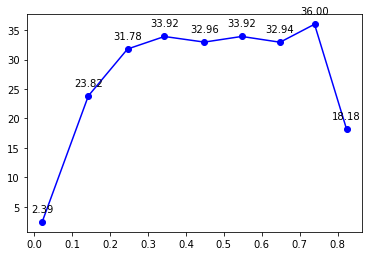

In [19]:
plt.plot(x,y,'bo-')

for x,y in zip(x,y):
    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.show()